# Lévy alpha-stable distribution

In this code, we perform multiple experiments with Lévy alpha-stable distributed random variables and calculate the histogram of outcomes for each experiment. Additionally, we plot the corresponding theoretical normal distribution curve based on the mean and standard deviation of the outcomes.

The Lévy alpha-stable distribution is a family of probability distributions that includes the Gaussian (normal) distribution as a special case. However, unlike the normal distribution, which satisfies the Central Limit Theorem and converges to a normal distribution for sums of random variables, the Levy-stable distribution does not always follow this pattern. The Central Limit Theorem states that the sum of a large number of independent and identically distributed random variables tends to be approximately normally distributed, regardless of the original distribution.

- For alpha = 2 (Gaussian distribution), beta = 0:
    - The histogram should resemble a bell-shaped curve, similar to the shape of the theoretical normal distribution curve (in red).
    - The mean and standard deviation of the outcomes should match closely with the theoretical values, and the histogram should be well-centered around the mean.
- For alpha ≠ 2 and beta = 0:
    - The histogram may not closely resemble a normal distribution, even though the theoretical curve is still shown.
    - The shape of the histogram will be influenced by the stability parameter alpha, and it might exhibit heavier tails or skewness.
- For beta ≠ 0:
    - The histogram might show asymmetry (skewness) and thicker tails compared to the theoretical normal distribution curve.
    - The presence of a non-zero skewness parameter (beta) in the Levy-stable distribution can lead to a significant departure from a normal distribution.
- For alpha ≠ 2 and beta ≠ 0:
    - The histogram might display more pronounced deviations from a normal distribution, especially when both alpha and beta differ from their standard values.
    - Depending on the values of alpha and beta, the Levy-stable distribution can exhibit various features such as fat tails, heavy skewness, and long tails.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable, norm

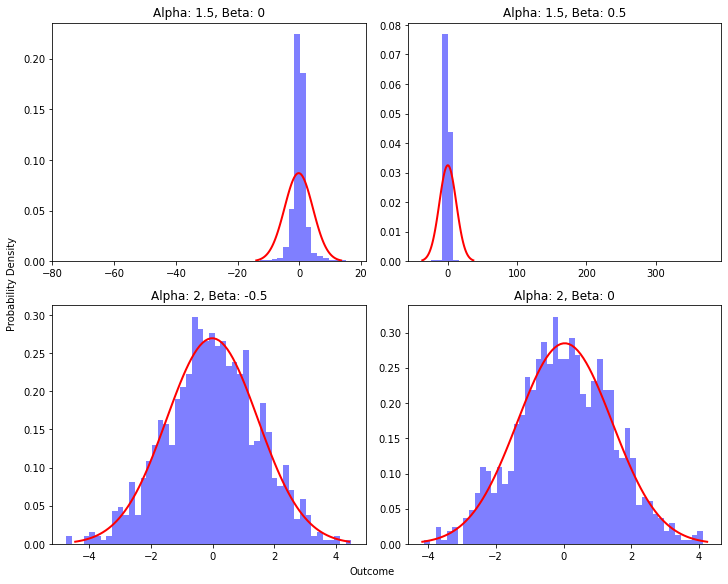

In [2]:
def generate_histogram(num_experiments, alpha, beta, subplot_position):
    # Perform the experiments
    outcomes = levy_stable.rvs(alpha, beta, scale=1, size=num_experiments)

    # Create a subplot
    plt.subplot(subplot_position)

    # Plot the histogram of outcomes
    plt.hist(outcomes, bins=50, density=True, alpha=0.5, color='blue')

    # Get mean and standard deviation of outcomes
    mu, std = np.mean(outcomes), np.std(outcomes)

    # Generate a range of x values
    x = np.linspace(mu - 3*std, mu + 3*std, 100)

    # Calculate the corresponding y values using the normal distribution
    y = norm.pdf(x, mu, std)

    # Plot the theoretical normal distribution curve
    plt.plot(x, y, color='red', linewidth=2)

    # Set plot title
    plt.title(f'Alpha: {alpha}, Beta: {beta}')

# Set the number of experiments
num_experiments = 1000

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Generate histograms for different alphas and betas
generate_histogram(num_experiments, 1.5, 0, 221)
generate_histogram(num_experiments, 1.5, 0.5, 222)
generate_histogram(num_experiments, 2, -0.5, 223)
generate_histogram(num_experiments, 2, 0, 224)

# Set common labels
fig.text(0.5, 0, 'Outcome', ha='center', va='center')
fig.text(0, 0.5, 'Probability Density', ha='center', va='center', rotation='vertical')

# Adjust spacing
plt.tight_layout()

# Display the plots
plt.show()
